In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import sys
from pandas import DataFrame, Series

In [2]:
#  This experiment investigates how the reddit post scores varies as a function of the reddit post date (month, year)

author_bot = pd.read_csv("../bot_authors_2015_05.csv")
reddit = pd.read_csv("../fem_mr_comments.csv", usecols=["subreddit", "created_utc", "author", "score", "body"])

reddit = reddit.ix[~reddit["author"].isin(author_bot["author"]), :]
reddit = reddit.ix[reddit["body"] != "[deleted]", :]

reddit = reddit.drop("body", axis=1)

reddit["subreddit"] = reddit["subreddit"].astype(str)
reddit["author"] = reddit["author"].astype(str)
reddit["score"] = reddit["score"].astype(float)
reddit["created_utc"] = reddit["created_utc"].map(lambda x: datetime.datetime.fromtimestamp(x))
reddit["year"] = reddit["created_utc"].map(lambda x: x.year)
reddit["month"] = reddit["created_utc"].map(lambda x: x.month)

feminism = reddit[reddit["subreddit"] == "Feminism"]
mensrights = reddit[reddit["subreddit"] == "MensRights"]

fem = list(feminism.groupby(["year", "month"]))
men = list(mensrights.groupby(["year", "month"]))
fem = map(lambda x: ("_".join([str(x[0][0]), str(x[0][1])]), x[1]), fem)
men = map(lambda x: ("_".join([str(x[0][0]), str(x[0][1])]), x[1]), men)

size = 9

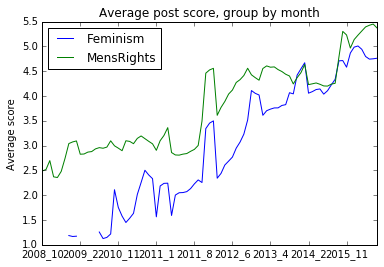

In [3]:
data1 = []
index = []
for i in range(len(fem) - size + 1):
    myid = str(fem[i + size/2][0])
    index.append(myid)
    score = []
    for j in range(i, i + size):
        score.extend(fem[j][1]["score"].tolist())
    data1.append(np.mean(score))
data1 = Series(data1, index=index)

data2 = []
index = []
for i in range(len(men) - size + 1):
    myid = str(men[i + size/2][0])
    index.append(myid)
    score = []
    for j in range(i, i + size):
        score.extend(men[j][1]["score"].tolist())
    data2.append(np.mean(score))
data2 = Series(data2, index=index)

df = pd.concat([data1, data2], axis=1)
df.columns = ["Feminism", "MensRights"]
df.plot()
plt.ylabel("Average score")
plt.title("Average post score, group by month")
plt.show()


In [1]:
# Notice the co-occurrence of peak in both Feminism and MensRights (during late 2011 to early 2012) 